## Домашнее задание 2


В этом домашнем задании мы закрепим основные концепты, которые прошли во втором модуле.

Представьте, что вы работаете дата-аналитиком в крупном инвестфонде. Вам дали данные по выручке и стоимости акций крупных компаний за 2019—2024 гг. А также предоставили динамику изменения стоимости самых популярных полезных ископаемых. Ваша задача — провести первичный анализ имеющихся данных и сделать ряд выводов относительно роста различных компаний, а также целесообразности инвестиций в них.

Подробнее со структурой датасета можно познакомиться [по ссылке](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data).

Не забывайте, что каждый построенный вами график должен иметь законченный вид: должны быть подписаны оси, добавлено релевантное название. Там, где это нужно, стоит добавить легенду.

In [16]:
# Импортируем все библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression

In [2]:
stock_market = pd.read_csv(
    "https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='str')

In [4]:
stock_market.info()

<class 'pandas.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   str    
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   str    
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   str    
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   str    
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   str    
 14  Nasdaq_100_Price   1243 non-null   str    
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 non-null   

> В данных наличествуют типы данных float и str, для даты это понятно (при открытии файла мы не распарсили), для цен (а у нас датассет про цены и объем) это ошибка, сразу приведем цены к численному типу.

In [5]:
columns_to_numeric = stock_market.columns.to_list()[1:]
for i in columns_to_numeric:
    try:
        stock_market[i] = pd.to_numeric(stock_market[i].str.replace(",", "")) # сразу выкинем разделитель запятую
    except AttributeError: # что бы не сильно париться
        stock_market[i] = pd.to_numeric(stock_market[i])

# И посмотрим на типы
stock_market.info()

<class 'pandas.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   str    
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   float64
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   float64
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   float64
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   float64
 14  Nasdaq_100_Price   1243 non-null   float64
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 non-null   

> Бинго!
---

## Задание 1 (3 балла)

Посмотрите текущий тип данных столбца с датами. Преобразуйте тип данных в формат `pandas.Timestamp`.

С помощью функционала библиотеки `Pandas` создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [6]:
# Проверка типа данных до преобразования
display(stock_market.Date.info())

# Преобразование типа в timestamp
stock_market.Date = pd.to_datetime(stock_market.Date, format="%d-%m-%Y")

# Проверка типа данных после преобразования
display(stock_market.Date.info())

<class 'pandas.Series'>
RangeIndex: 1243 entries, 0 to 1242
Series name: Date
Non-Null Count  Dtype
--------------  -----
1243 non-null   str  
dtypes: str(1)
memory usage: 9.8 KB


None

<class 'pandas.Series'>
RangeIndex: 1243 entries, 0 to 1242
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1243 non-null   datetime64[us]
dtypes: datetime64[us](1)
memory usage: 9.8 KB


None

> pd.to_datetime возвращает Series с типом datetime64[ns], что соответствует pandas.Timestamp для каждого элемента.

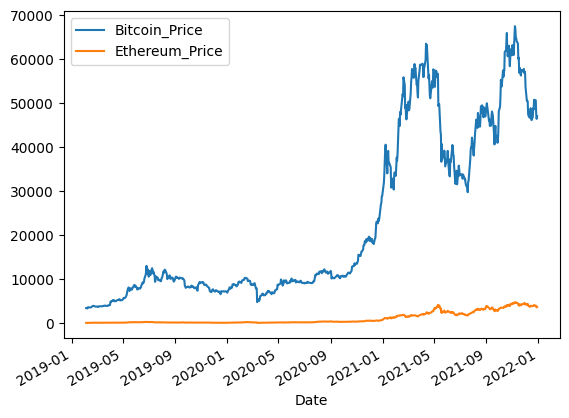

In [7]:
bit_et_price = stock_market[[
    "Date", "Bitcoin_Price", "Ethereum_Price"]].set_index("Date")

bit_et_price = bit_et_price.sort_index()  # Сортанем для красоты

# Дадим границы - маски
sup = '2021-12-31'
inf = '2019-01-01'

# Отфильтруем
bit_et_price = bit_et_price[(bit_et_price.index < sup)
                            & (bit_et_price.index > inf)]

# Отрисуем
bit_et_price.plot.line()
plt.show() # Что бы скинуть тех коммент

---

## Задание 2 (2 балла)

Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019—2024 гг. (`Natural Gas`, `Crude Oil`, `Copper`, `Platinum`, `Gold`). Цены рассчитайте относительно 4 февраля 2019 года (Цены в этот день возьмите за 1, остальные цены рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Gold_Price
Date,,,,,
2024-02-02,0.781579,1.324780,1.366041,1.096170,1.556659
2024-02-01,0.770677,1.353006,1.377480,1.121337,1.569848
2024-01-31,0.789474,1.390213,1.396247,1.133860,1.567043
2024-01-30,0.780827,1.426320,1.398034,1.132766,1.554536
2024-01-29,0.936090,1.407258,1.386595,1.140790,1.542409


,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Gold_Price
Date,,,,,
2019-02-08,0.971053,0.966276,1.005898,0.975319,0.999394
2019-02-07,0.959023,0.964809,1.012332,0.973617,0.996134
2019-02-06,1.000752,0.989919,1.015192,0.981277,0.996286
2019-02-05,1.000752,0.983504,1.008222,0.998602,0.999924
2019-02-04,1.000000,1.000000,1.000000,1.000000,1.000000


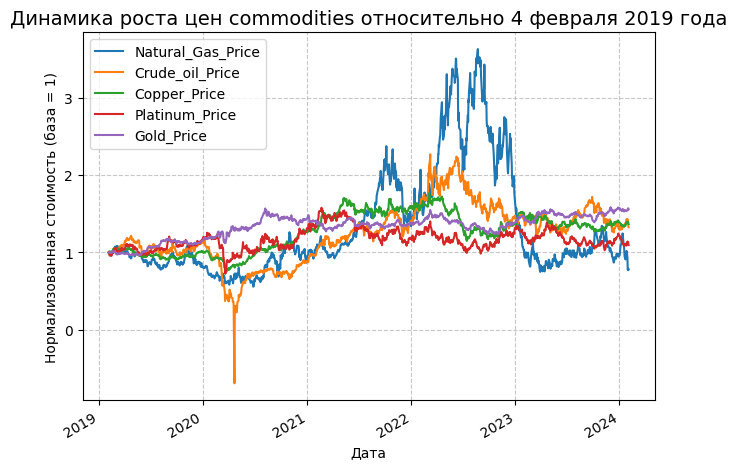

In [8]:
# Выведем все необходимые колонки
nat_res = ["Date", "Natural_Gas_Price", "Crude_oil_Price",
           "Copper_Price", "Platinum_Price", "Gold_Price"]

nat_res_price = stock_market[nat_res]
nat_res_price = nat_res_price.set_index("Date")

base = nat_res_price.loc["2019-02-04"] # Возьмем базу нормализации
normalise_nat_res_price = nat_res_price.div(base, axis=1) # используем встроенный метод указав флаг работы по оси столбцов

# Проверим что получилось 
display(normalise_nat_res_price.head(), normalise_nat_res_price.tail())

# Отрисуем
normalise_nat_res_price.plot.line()
plt.title('Динамика роста цен commodities относительно 4 февраля 2019 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Нормализованная стоимость (база = 1)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show() 

> Видим аномалию по нефти, проверим на отрицательные значения и уберем, интерполировав и восстановив приближение на аномалии

Найдено 1 отрицательных значений. Заменяем на NaN и интерполируем.


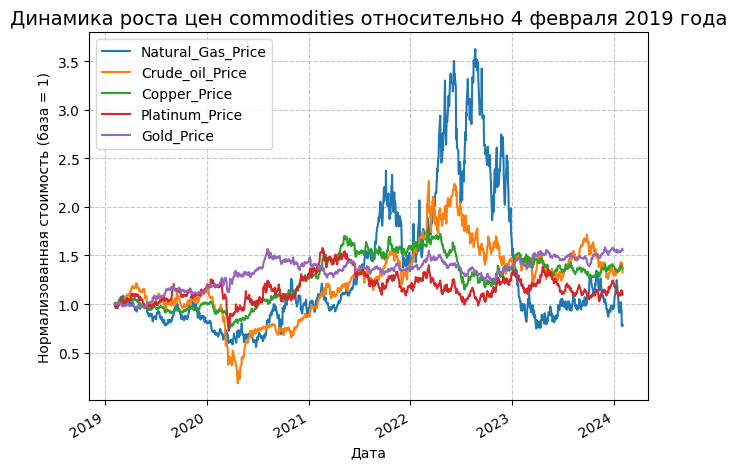

In [9]:
# Создаем копию нормализованных данных (чтобы избежать предупреждений)
clean_prices_nat_res = normalise_nat_res_price.copy()

# Проверяем наличие отрицательных цен на нефть
mask_negative = clean_prices_nat_res['Crude_oil_Price'] < 0
if mask_negative.any():
    print(f"Найдено {mask_negative.sum()} отрицательных значений. Заменяем на NaN и интерполируем.")
    # Замена отрицательных значений на NaN
    clean_prices_nat_res.loc[mask_negative, 'Crude_oil_Price'] = np.nan
    
    # Интерполяция по времени (method='time' использует индекс дат)
    clean_prices_nat_res['Crude_oil_Price'] = clean_prices_nat_res['Crude_oil_Price'].interpolate(method='time')
else:
    print("Отрицательных значений нефти не обнаружено.")
    
# Отрисуем
clean_prices_nat_res.plot.line()

plt.title('Динамика роста цен commodities относительно 4 февраля 2019 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Нормализованная стоимость (база = 1)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show() 

> Вот теперь адекватно. 
> Исходя из данных на графике можно выделить 3 вывода:
1. Атипичную динамику (в контексте поведения в историческом окне) цен на газ, что обусловлено влиянием экзогенных факторов макрополитического характера,с последующей стабилизацией и выравниванием к предшоковому периоду.
2. Стабильный восходящий тренд всего выбранного портфеля (шоковые всплески компенсируются уровнем афтершока).
3. Слоп тренда укладывается в эконометрическую догматику о длинном горизонте прибыльности для commodities.
---

## Задание 3 (6 баллов)
Среди всех IT-компаний явно выделяются пять наиболее крупных компаний, которые объединены аббревиатурой `FAANG` (`Meta* (Former Facebook)`, `Amazon`, `Apple`, `Netflix`, `Google`). Многие программисты считают пиком возможной карьеры попадание именно в эти компании, а инвесторы пристально следят за деятельностью данных компаний. Давайте узнаем, насколько это оправданно.

**Признана экстремистской и запрещена на территории РФ*

**Задание 3.1**

Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата `pandas.Series` и возвращать сумму этих серий.

Подсказка: используйте инструментарий [\*args и \**kwags](https://book.pythontips.com/en/latest/args_and_kwargs.html).

С помощью метода `.apply()` создайте новый столбец `FAANG`, который будет представлять собой сумму стоимости акций всех компаний, входящих в это символическое объединение.

In [10]:
# Список интересующих колонок
faang_cols = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']

#
def faang_sum(*args, **kwargs):
    return sum(args)

# Выведение агрегации по фаангу
stock_market["FAANG"] = stock_market[faang_cols].apply(lambda x: faang_sum(*x), axis=1)

display(stock_market.head())

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,FAANG
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,...,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN,1539.67
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0,1449.59
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0,1433.95
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0,1461.41
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0,1483.31


**Задание 3.2**

Аналогично с заданием 3 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные рассчитайте как соотношение). Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года. Также нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего. А те компании, которые росли медленнее, покрасьте в оттенки красного.

Добавьте легенду и все остальные аттрибуты.

,Meta_Price,Amazon_Price,Apple_Price,Netflix_Price,Google_Price,FAANG
Date,,,,,,
2024-02-02,2.806440,2.103710,4.341275,1.607104,2.494831,2.192825
2024-02-01,2.332526,1.950288,4.364868,1.615273,2.473454,2.064531
2024-01-31,2.305111,1.900331,4.307405,1.605596,2.454880,2.042257
2024-01-30,2.363722,1.946859,4.392432,1.602009,2.653934,2.081366
2024-01-29,2.369394,1.974532,4.478626,1.638840,2.689855,2.112556


,Meta_Price,Amazon_Price,Apple_Price,Netflix_Price,Google_Price,FAANG
Date,,,,,,
2019-02-08,0.988656,0.972328,0.995095,0.989270,0.965831,0.985601
2019-02-07,0.983043,0.988368,0.998131,0.981129,0.968985,0.982482
2019-02-06,1.007326,1.004163,1.017519,1.002419,0.983704,1.003204
2019-02-05,1.011285,1.015550,1.017286,1.012723,1.009112,1.012690
2019-02-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


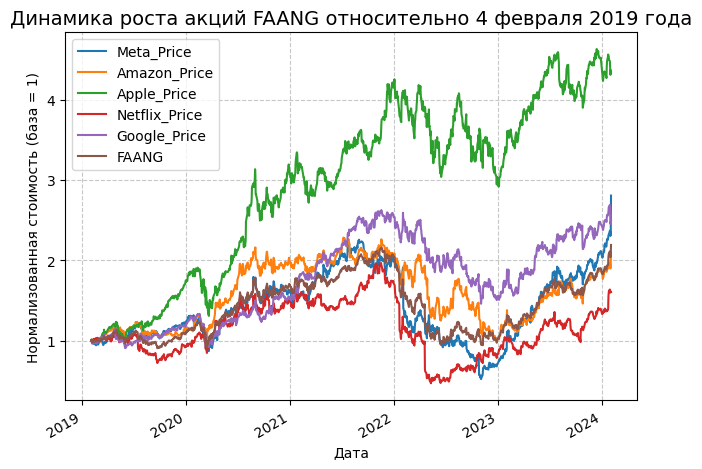

In [11]:
# Выведем все необходимые колонки
faang_dynamic_cols = ["Date", 'Meta_Price', 'Amazon_Price', 'Apple_Price',
                      'Netflix_Price', 'Google_Price', 'FAANG']

faang_dynamic = stock_market[faang_dynamic_cols]
faang_dynamic = faang_dynamic.set_index("Date")

base_faang = faang_dynamic.loc["2019-02-04"]  # Возьмем базу нормализации
# используем встроенный метод указав флаг работы по оси столбцов
normalise_faang_dynamic = faang_dynamic.div(base_faang, axis=1)

# # Проверим что получилось
display(normalise_faang_dynamic.head(), normalise_faang_dynamic.tail())

# # Отрисуем
normalise_faang_dynamic.plot.line()

plt.title('Динамика роста акций FAANG относительно 4 февраля 2019 года', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Нормализованная стоимость (база = 1)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Исходя из представленной на графике информации можно сделать следующие выводы:
1. Можно отметить шоковые переходы на этапах пандемии и ее окончания (особенно драматичная ситуация с Netflix - что характерно ввиду формирования нового паттерна поведения у пользователей).
2. Шоковый переход в 22 году, отсутсвующий на графике commodities (за исключением газа), что говорит о большей чувствительности портфеля на изменение геополитики.
3. Высокую волатильность акций Apple, вероятно обусловленную направленностью на B2C сектор и привязке к узкой линейке продуктовых решений, что в свою очередь формирует зависимость от общественного консенсуса и мало обусловленно фактической бизнес составляющей. Так же высокая дисперсия на окнах может обуславливать и слоп тренда - высокая дисперсия приводит и к вероятному крутому взлету/падению, так как является благодатным полем для спекулятивной торговли и шортов.
4. Акции Netflix наиболее уязвимы и менее перспективны для формирования долгосрочного портфеля.
5. Акции Amazon и Google наиболее стабильны ввиду широкой линейки B2B продуктов и высокой степени интеграции в полотно IT-сектора по всему миру, что формирует прочный фундамент и приоритезирует их в портфеле на роль стабилизационных активов (safe-haven в контекстее FAANG).
6. Акции Meta наиболее близки к силуэту FAANG, что в свою очередь можно интерпретировать как способность этих бумаг к обобщению ситуации на рынке и возможному варианту формирования портфеля не на пакете акций или трейдинге на индексе, а вложении в единственную бумагу (что интересно).

**Задание 3.3**

Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

Создайте линейный график с двумя линиями.
Первая линия будет отвечать за полезные ископаемые. Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение будет равно 1.1.
Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.

Аналогичную процедуру проведите для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.

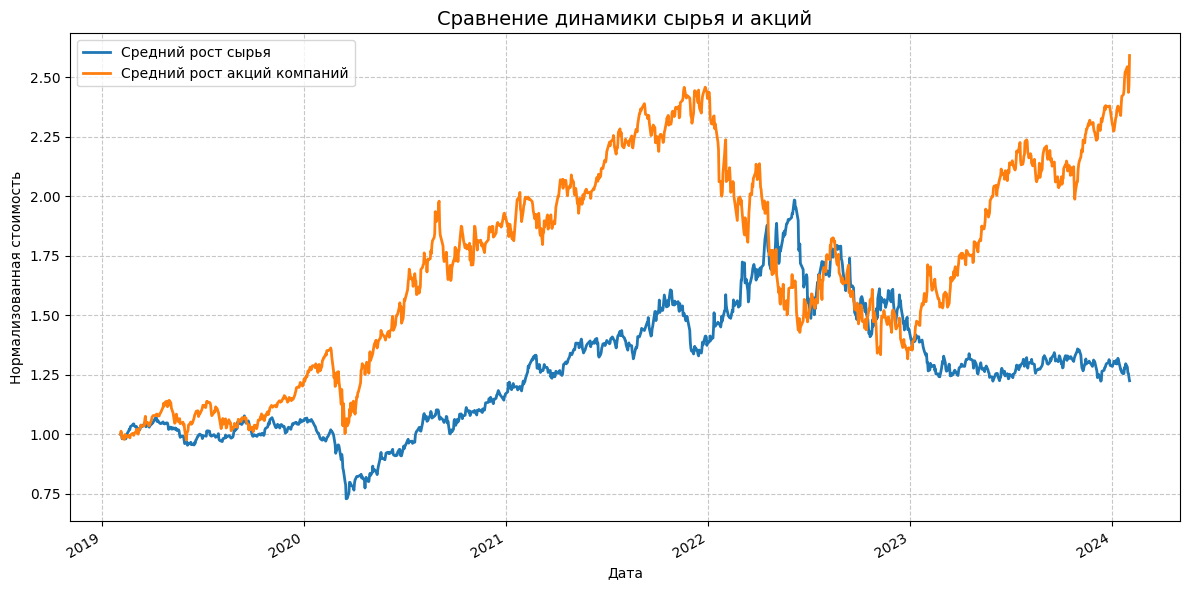

In [12]:
# Свертка портфелей
mean_nat_res = clean_prices_nat_res.mean(axis=1)
mean_stocks = normalise_faang_dynamic.mean(axis=1)

# Построение графика
plt.figure(figsize=(12, 6))
mean_nat_res.plot(label='Средний рост сырья', linewidth=2)
mean_stocks.plot(label='Средний рост акций компаний', linewidth=2)

plt.title('Сравнение динамики сырья и акций', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Нормализованная стоимость')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


На основании полученных результатов ответьте на следующий вопрос: **Во что лучше инвестировать — полезные ископаемые или акции компаний?**

**Ваш ответ:**
> Сюрпризов нет. Сырьевые акции обладают низкой волатильностью, в общем случае их свернутая функция по портфелю стабизизирует дисперсию и, хоть это и не совсем так, но подталкивает к идее о том что сыревой ряд гораздо ближе к гомоскедастичности (что напрямую влияет на доверительные интервалы на средне и долгосроке) и стационарности ряда. Итого сыревые товары - выбор среднедолгосрока (классический вывод)

> FAANG обладает обратными характеристиками, что делает их претендентами на формирование краткосрочного и/или спекулятивного портфеля.

> Оптимальным вариантом на мой взгляд является комбинированный портфель из наиболее стабильных акций FAANG (Amazon+Google) для обеспечения фактора роста и наиболее стабильных commodity активов (золото+ медь - как активов менее подверженным флуктуациям- золото, и стабильностью за счет промышленной интеграции-медь) в пропорции 30/70 в сторону commodity c акцентом на долгосрок.

---

## Задание 4 (6 баллов)
Давайте попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

**Задание 4.1**

С помощью библиотек `matplotlib` и `seaborn` создайте поле (`plt.subplots()`), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.

Компании с ростом >= 2: ['Meta_Price', 'Apple_Price', 'Google_Price']


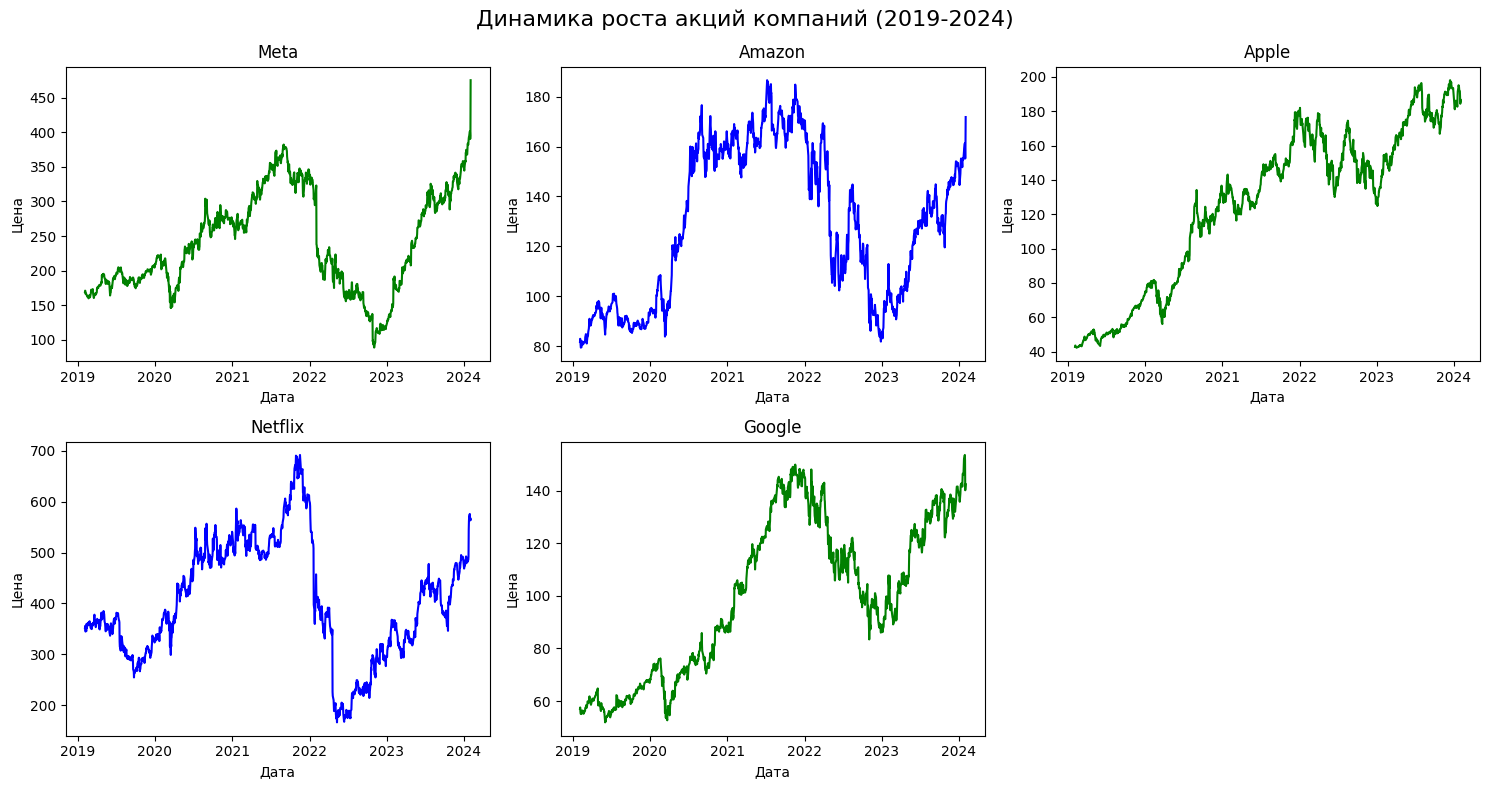

In [13]:
# faang_dynamic
# Начало 2019: ищем ближайшую дату к 2019-01-01
start_2019 = faang_dynamic.index.asof(pd.Timestamp('2019-01-01'))
# Начало 2024: ближайшая дата к 2024-01-01
start_2024 = faang_dynamic.index.asof(pd.Timestamp('2024-01-01'))


# Определим компании, удовлетворяющие условию удвоения
green_companies = []
for comp in faang_cols:
    price_2019 = faang_dynamic.loc[start_2019, comp]
    price_2024 = faang_dynamic.loc[start_2024, comp]
    if price_2024 / price_2019 >= 2:
        green_companies.append(comp)

print(f"Компании с ростом >= 2: {green_companies}")

# Создадим subplots
n_companies = len(faang_cols)
cols = 3  # количество столбцов в сетке
rows = (n_companies + cols - 1) // cols  # округление вверх

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

# Строим графики
for i, comp in enumerate(faang_cols):
    ax = axes[i]
    
    # Определяем цвет
    color = 'green' if comp in green_companies else 'blue'
    
    # Построение линии
    ax.plot(faang_dynamic.index, faang_dynamic[comp], color=color, linewidth=1.5)
    ax.set_title(comp.replace('_Price', ''))  # убираем суффикс для красоты
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')

# Если остались лишние подграфики, скрываем их
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Динамика роста акций компаний (2019-2024)', fontsize=16)
plt.tight_layout()
plt.show()

**Задание 4.2**

С помощью библиотеки `plotly` создайте `lineplot`, в котором будет изображена динамика акций компаний за период с 2019 по 2024 г. Добавьте на график кнопки для каждой компании, нажав на которые можно было бы переключиться между визуализациями динамики изменения стоимости акций для разных компаний.

Добавьте название и подписи к осям каждого графика.

In [ ]:
# Фигура
fig = go.Figure()

# Добавляем трассы для каждой компании, изначально видима только первая
for i, company in enumerate(faang_cols):
    fig.add_trace(go.Scatter(
        x=faang_dynamic.index,
        y=faang_dynamic[company],
        name=company.replace('_Price', ''),  # убираем суффикс для красоты
        visible=(i == 0)  # только первый график видим изначально
    ))

# Кнопки 
buttons = []
for i, company in enumerate(faang_cols):
    buttons.append(dict(
        label=company.replace('_Price', ''),
        method='restyle',
        args=[{'visible': [j == i for j in range(len(faang_cols))]}]
    ))

# Добавляем меню с кнопками в layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        showactive=True,
        x=0.1,
        y=1.15,
        xanchor='left',
        yanchor='top'
    )],
    title='Динамика акций компаний',
    xaxis_title='Дата',
    yaxis_title='Цена акции',
    hovermode='x unified'
)

fig.show()

---

## Задание 5 (3 балла)
1. Напишите функцию, которая будет принимать на вход название компании и с помощью этого названия строить `scatter plot` с зависимостью цены (`Price`) акций от оборота (`Volume`) компании.
2. На каждый `scatter plot` добавьте линию линейной регрессии, которая будет показывать получившуюся зависимость. Получившуюся линию покрасьте в красный цвет.
3. Также на `scatter plot` добавьте текст с получившимся уравнением (вида $y = \beta_{0} + \beta_{1} X $).
4. Постройте поле (`plt.subplots()`) в котором будут изображены диаграммы рассеяния для всех компаний, присутствующих в датасете (используйте метод `.pipe()`). Каждая диаграмма рассеяния должна представлять собой зависимость цен на акции от выручки, иметь линию регрессии, а также текст с регрессионным уравнением для конкретной компании.

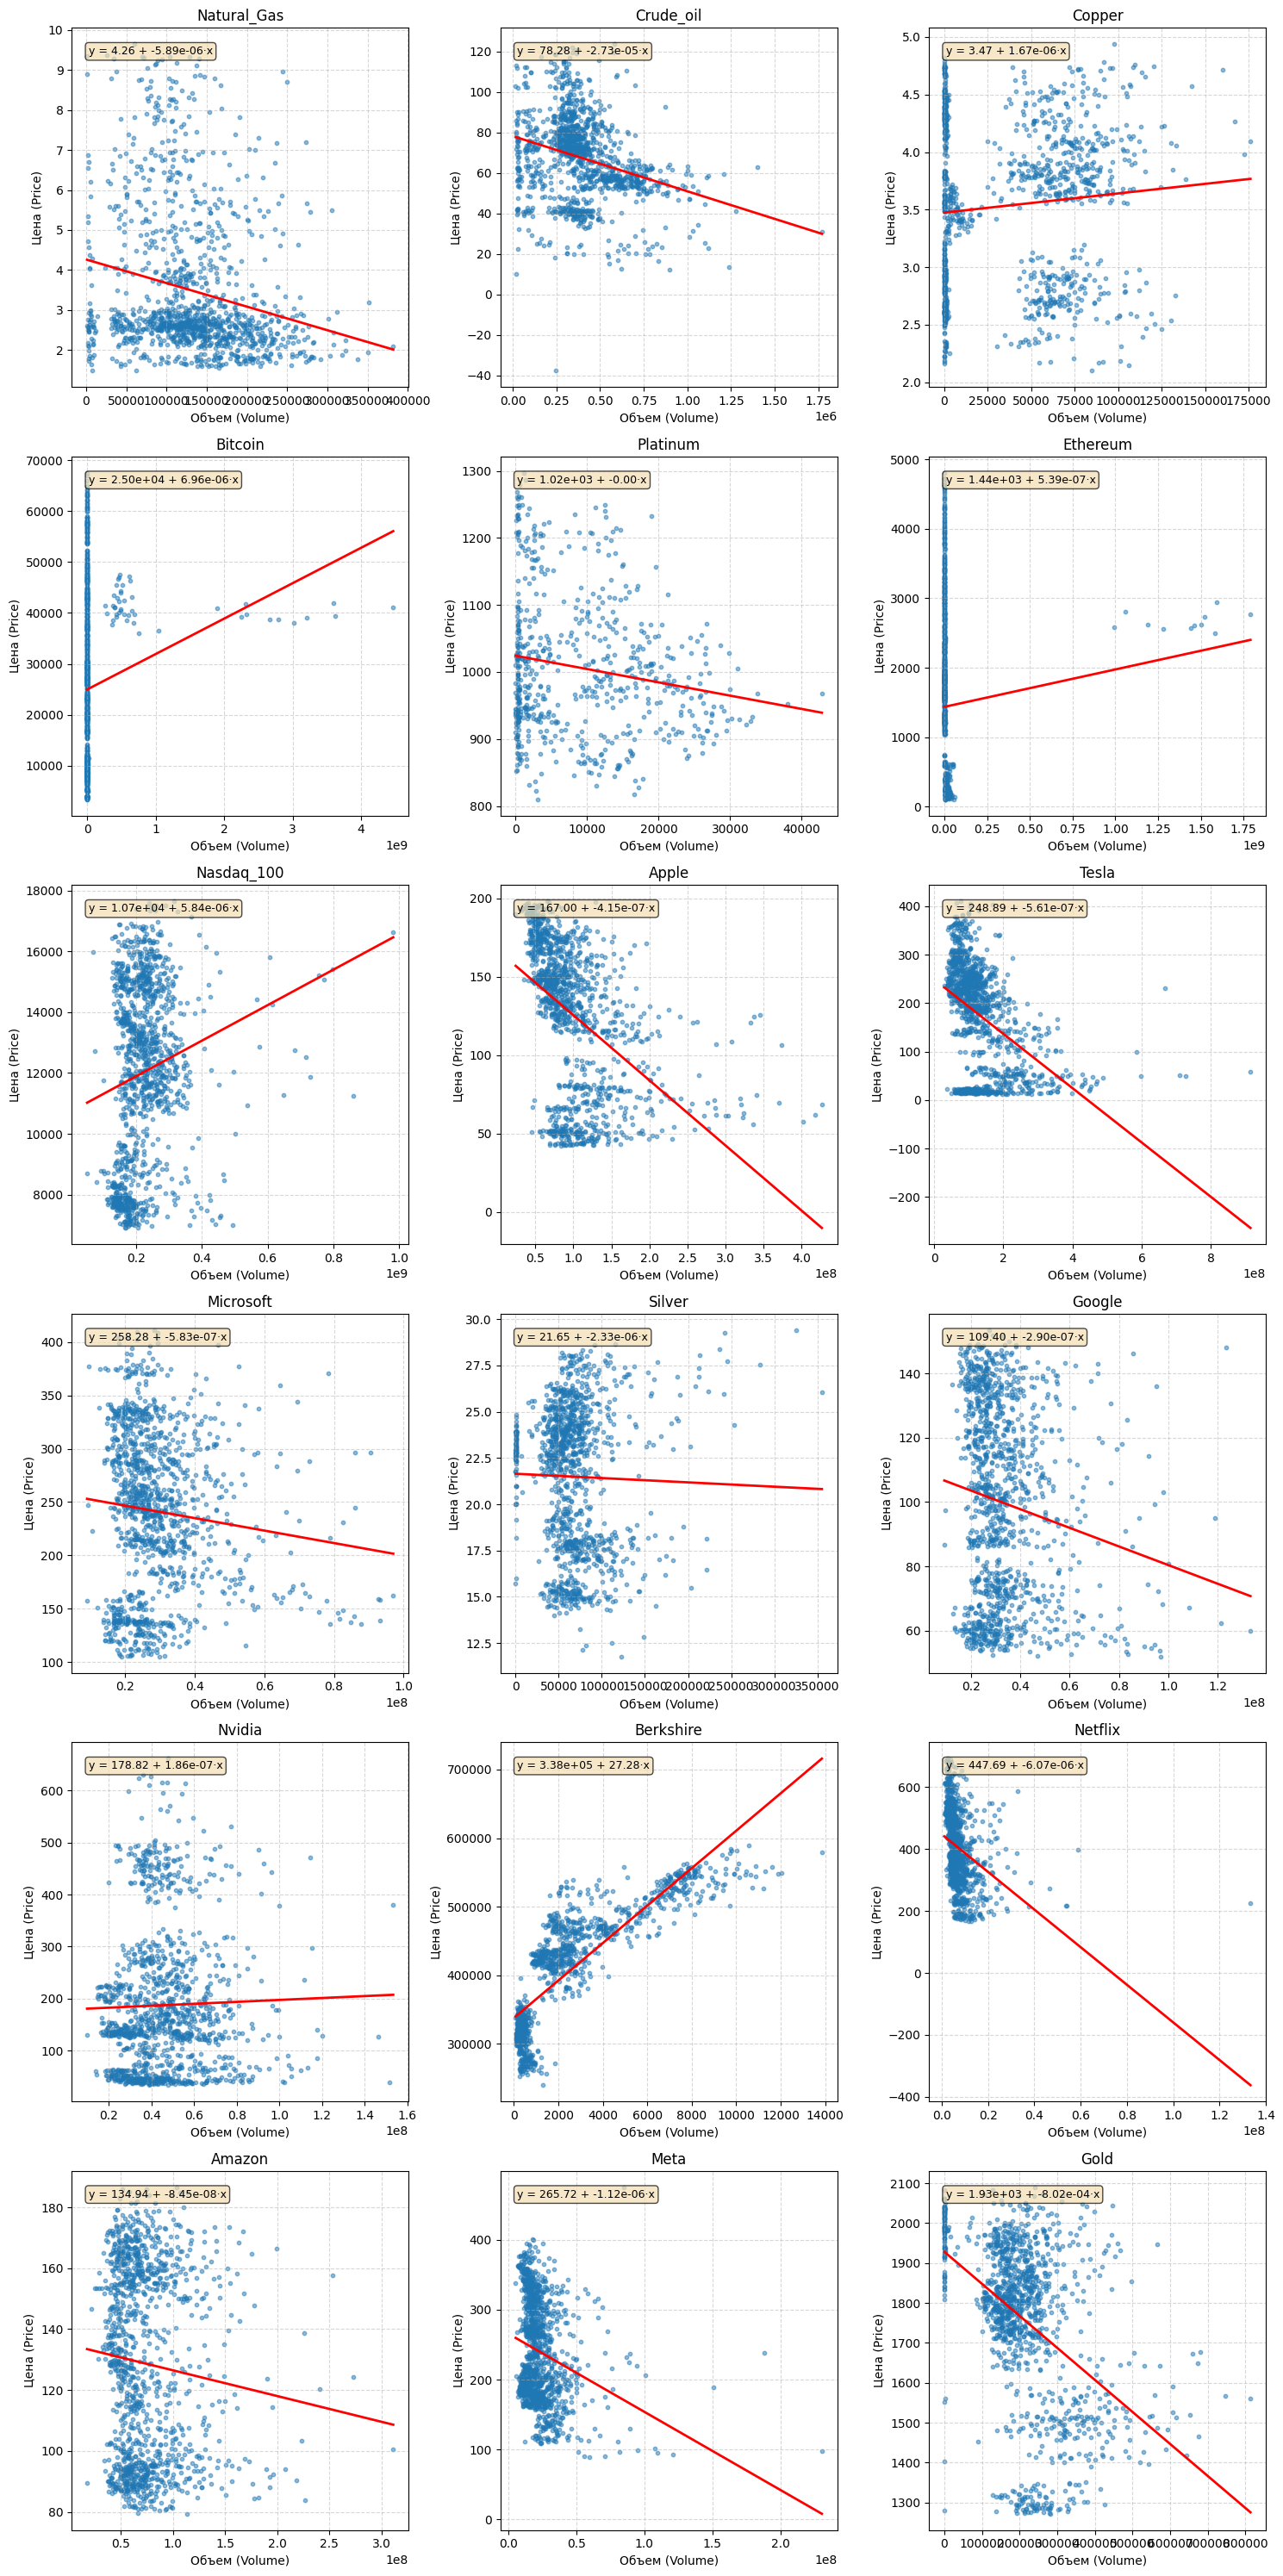

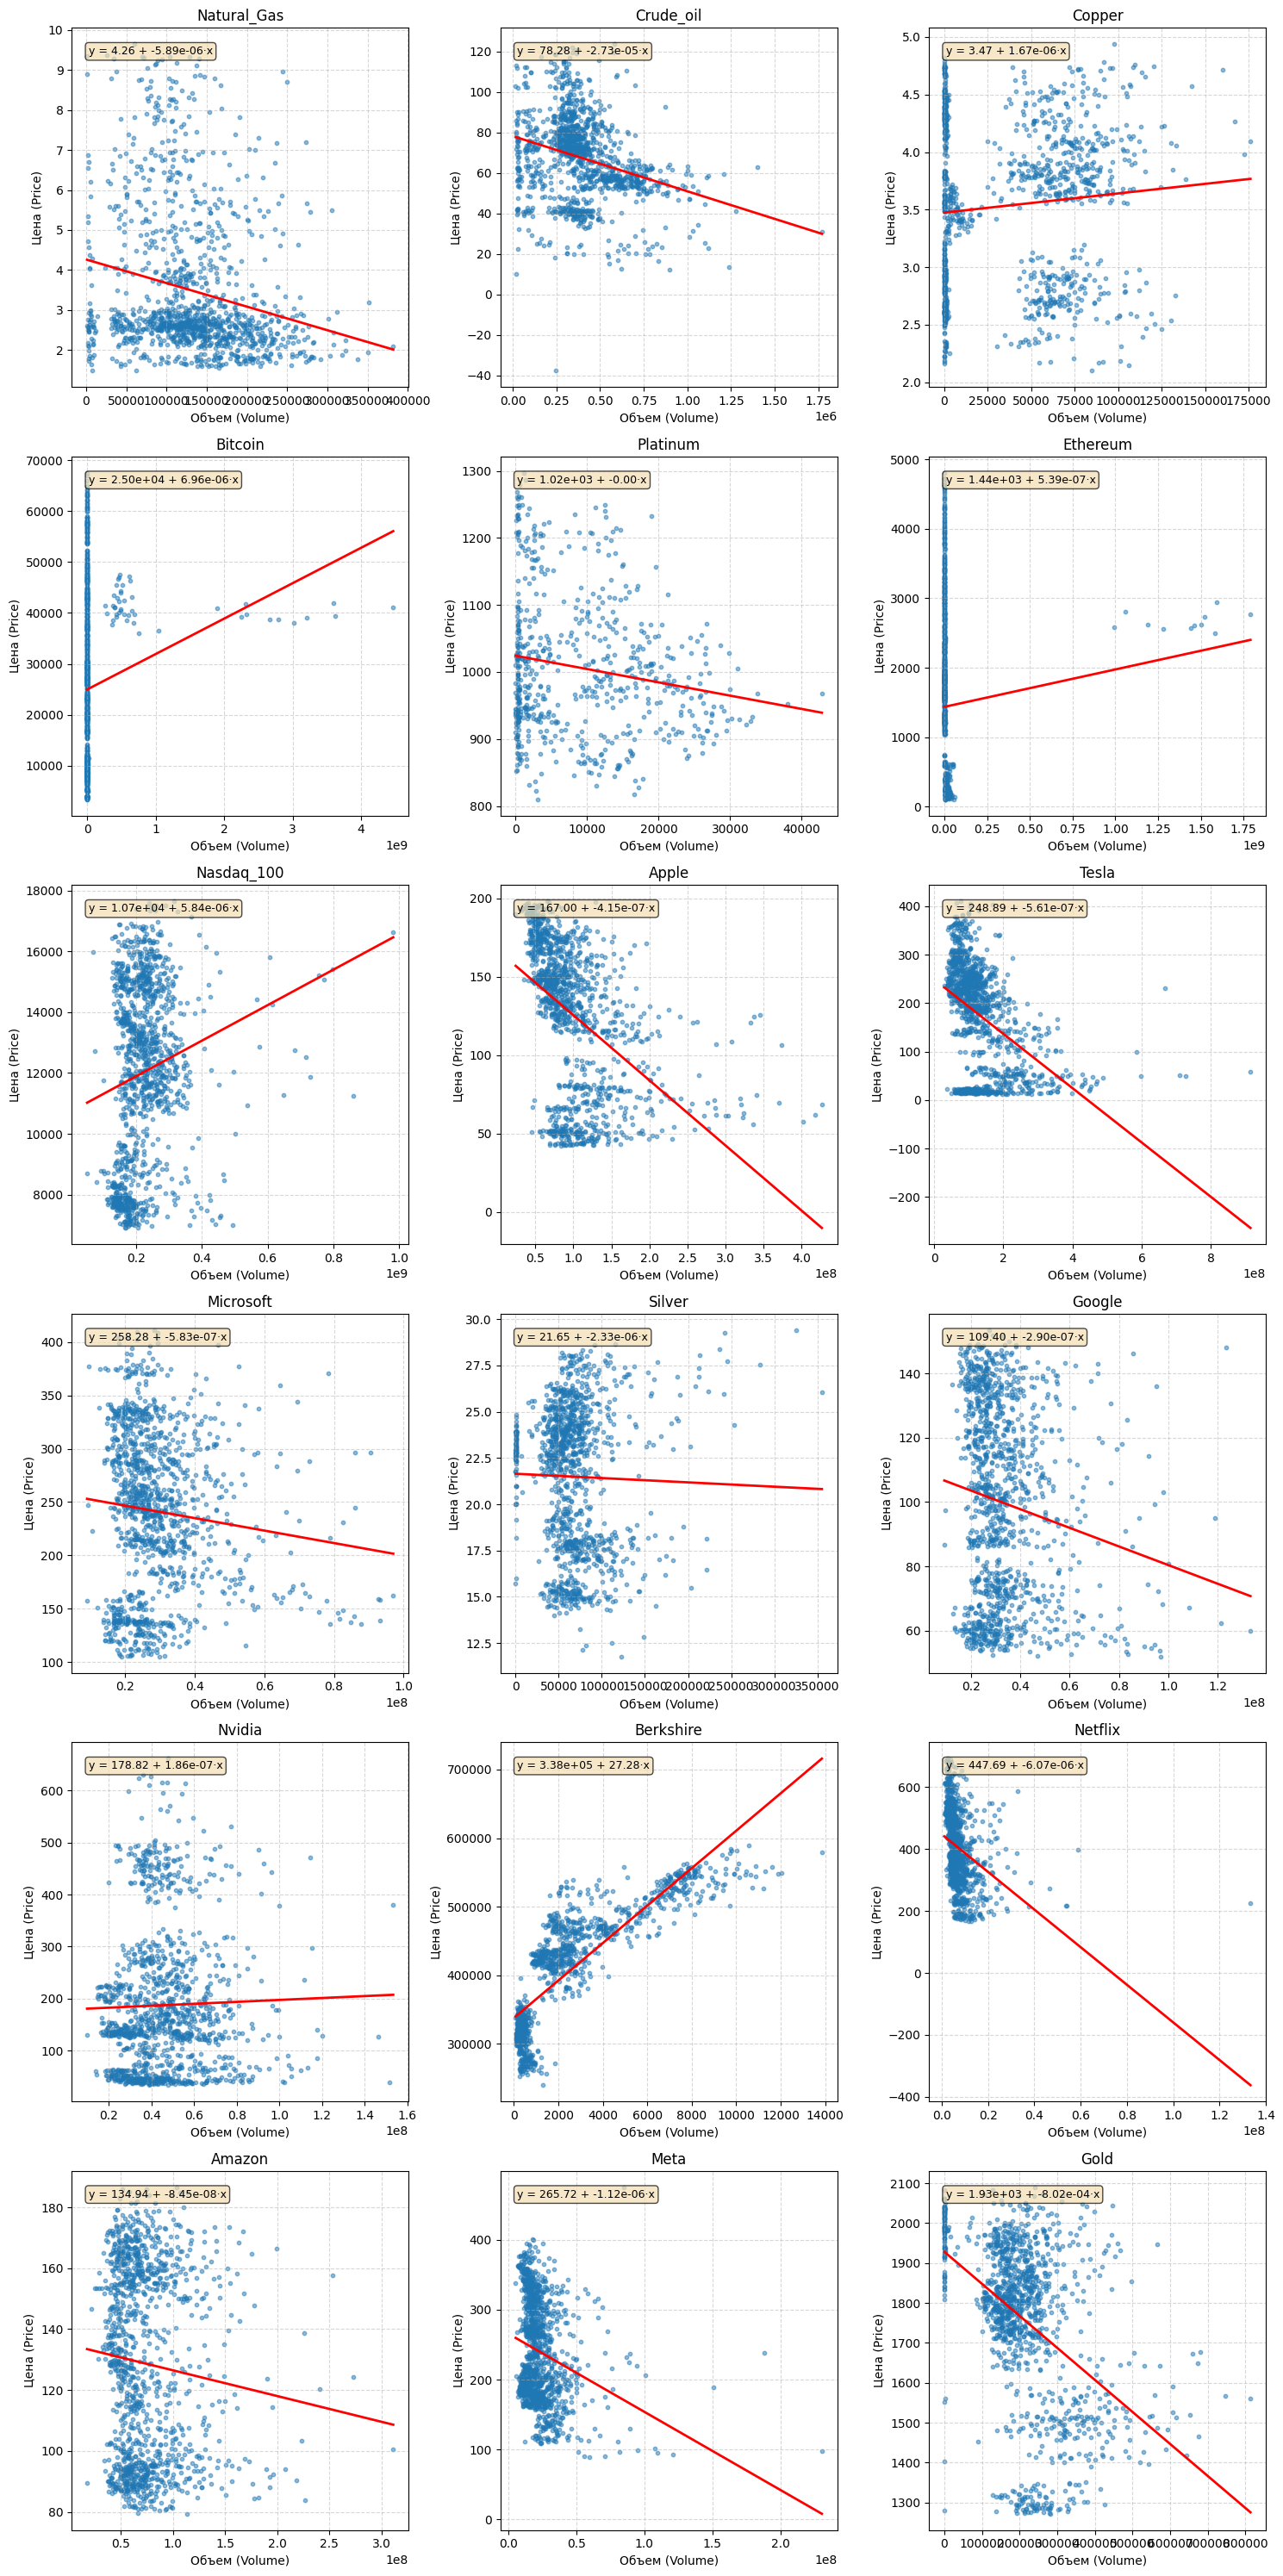

In [22]:
def plot_company(company, data, ax):
    # Формируем имена колонок
    price_col = f"{company}_Price"
    volume_col = f"{company}_Vol."
    
    
    # Убираем пропуски
    df_clean = data[[price_col, volume_col]].dropna()
    if df_clean.empty:
        print(f"Предупреждение: для компании {company} нет данных после удаления пропусков")
        return None
    
    x = df_clean[volume_col].values.reshape(-1, 1)
    y = df_clean[price_col].values
    
    # Построение scatter
    ax.scatter(x, y, alpha=0.5, s=10)
    
    # Линейная регрессия
    if len(x) > 1:
        coeffs = np.polyfit(x.flatten(), y, 1) 
        slope, intercept = coeffs[0], coeffs[1]
        
        # Линия регрессии
        x_line = np.linspace(x.min(), x.max(), 100)
        y_line = slope * x_line + intercept
        ax.plot(x_line, y_line, color='red', linewidth=2, label='Регрессия')

        if abs(slope) < 0.001 or abs(slope) > 1000:
            slope_str = f"{slope:.2e}"
        else:
            slope_str = f"{slope:.2f}"
        
        if abs(intercept) < 0.001 or abs(intercept) > 1000:
            intercept_str = f"{intercept:.2e}"
        else:
            intercept_str = f"{intercept:.2f}"
        
        eq_text = f"y = {intercept_str} + {slope_str}·x"
        ax.text(0.05, 0.95, eq_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    ax.set_xlabel('Объем (Volume)')
    ax.set_ylabel('Цена (Price)')
    ax.set_title(company)
    ax.grid(True, linestyle='--', alpha=0.5)

def plot_all_companies(data):
    # Определяем список компаний по колонкам, оканчивающимся на '_Price'
    price_cols = [col for col in data.columns if col.endswith('_Price')]
    companies = [col.replace('_Price', '') for col in price_cols]
    
    # Оставляем только те, для которых есть соответствующий Volume
    valid_companies = []
    for comp in companies:
        if f"{comp}_Vol." in data.columns:
            valid_companies.append(comp)
    
    n = len(valid_companies)
    if n == 0:
        print("Нет компаний с полными данными (Price и Volume)")
        return
    
    # Параметры сетки
    cols = 3
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Если axes не одномерный, преобразуем
    if rows * cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # для случая 1x1
    
    # Построение для каждой компании
    for i, comp in enumerate(valid_companies):
        plot_company(comp, data, axes[i])
    
    # Скрыть неиспользуемые оси
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return fig 

# Применяем через .pipe() к данным stock_market
stock_market.pipe(plot_all_companies)

**Итоговый балл за домашнее задание = набранный балл / 2**

